Carregar o arquivo CSV que contém os dados tratados anteriormente.

In [ ]:
import pandas as pd

# Substitua o nome do arquivo abaixo, se necessário
df_modelo = pd.read_csv('dados_xtel_sem_nulos.csv')

# Verifica as primeiras linhas
df_modelo.head()


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40


In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   objec

Remoção de Colunas Irrelevantes

In [ ]:
df_modelo.drop(['customerid', 'account_charges_total'], axis=1, inplace=True)


In [ ]:
df_modelo.head(2)

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly
0,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6
1,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9


Transformar as variáveis categóricas em formato numérico

In [ ]:
# Criar um novo DataFrame com one-hot encoding nas colunas categóricas
df_dummies = pd.get_dummies(df_modelo, drop_first=True)


In [ ]:
df_dummies.head(2)

,customer_seniorcitizen,customer_tenure,account_charges_monthly,churn_Sim,customer_gender_Masculino,customer_partner_Sim,customer_dependents_Sim,phone_phoneservice_Sim,phone_multiplelines_Sem serviço de telefone,phone_multiplelines_Sim,...,internet_streamingtv_Sem serviço de internet,internet_streamingtv_Sim,internet_streamingmovies_Sem serviço de internet,internet_streamingmovies_Sim,account_contract_Bienal,account_contract_Mensal,account_paperlessbilling_Sim,account_paymentmethod_Cheque eletrônico,account_paymentmethod_Cheque enviado,account_paymentmethod_Transferência bancária
0,0,9,65.6,False,False,True,True,True,False,False,...,False,True,False,False,False,False,True,False,True,False
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   customer_seniorcitizen                             7032 non-null   int64  
 1   customer_tenure                                    7032 non-null   int64  
 2   account_charges_monthly                            7032 non-null   float64
 3   churn_Sim                                          7032 non-null   bool   
 4   customer_gender_Masculino                          7032 non-null   bool   
 5   customer_partner_Sim                               7032 non-null   bool   
 6   customer_dependents_Sim                            7032 non-null   bool   
 7   phone_phoneservice_Sim                             7032 non-null   bool   
 8   phone_multiplelines_Sem serviço de telefone        7032 non-null   bool   
 9   phone_mu

In [ ]:
# Converte todas as colunas booleanas para inteiros (0 e 1)
df_dummies = df_dummies.astype(int)


In [ ]:
df_dummies.dtypes.value_counts()


,count
int64,30


Verificação da Proporção de Evasão

In [ ]:
# Contagem absoluta
df_dummies['churn_Sim'].value_counts()


,count
churn_Sim,
0,5163
1,1869


In [ ]:
# Proporção de cada classe (0 = cliente ativo, 1 = cliente que cancelou)
df_dummies['churn_Sim'].value_counts(normalize=True).map('{:.2%}'.format)


,proportion
churn_Sim,
0,73.42%
1,26.58%


Balanceamento de Classes

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras e alvo
X = df_dummies.drop('churn_Sim', axis=1)
y = df_dummies['churn_Sim']

# Dividir os dados (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
# Visualizar nova distribuição
print(pd.Series(y_train_res).value_counts())


churn_Sim
1    3614
0    3614
Name: count, dtype: int64


Normalização ou Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

# Cria o scaler
scaler = StandardScaler()

# Aplica somente nos dados de treino e teste (já separados)
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  # Não aplica SMOTE aqui, apenas transforma


Análise de Correlação

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlação
correlacao = df_dummies.corr(numeric_only=True)

# Focar nas variáveis mais correlacionadas com o churn
correlacao_churn = correlacao['churn_Sim'].sort_values(ascending=False)
print(correlacao_churn)


churn_Sim                                            1.000000
account_contract_Mensal                              0.404565
internet_internetservice_Fibra óptica                0.307463
account_paymentmethod_Cheque eletrônico              0.301455
account_charges_monthly                              0.192922
account_paperlessbilling_Sim                         0.191454
customer_seniorcitizen                               0.150541
internet_streamingtv_Sim                             0.063254
internet_streamingmovies_Sim                         0.060860
phone_multiplelines_Sim                              0.040033
phone_phoneservice_Sim                               0.011691
customer_gender_Masculino                           -0.008545
phone_multiplelines_Sem serviço de telefone         -0.011691
internet_deviceprotection_Sim                       -0.066193
internet_onlinebackup_Sim                           -0.082307
account_paymentmethod_Cheque enviado                -0.090773
account_

✅ Principais variáveis com correlação positiva (mais risco de churn)

1. account_contract_Mensal	+0.40	Contrato mensal está fortemente ligado ao churn – quanto mais flexível, mais fácil cancelar.
2. internet_internetservice_Fibra óptica	+0.31	- Clientes com fibra óptica tendem a cancelar mais — pode indicar frustração com expectativa alta ou custo.
3. account_paymentmethod_Cheque eletrônico	+0.30	 - Pode estar relacionado com falta de fidelização e informalidade no pagamento.
4. account_charges_monthly	+0.19	Contas mensais mais altas estão associadas a maior evasão.
5. account_paperlessbilling_Sim	+0.19	Cobrança digital pode estar atrelada ao perfil de cliente mais volátil.

🟢 Principais variáveis com correlação negativa (retenção)

1. customer_tenure	-0.35	Clientes mais antigos tendem a ficar – forte indicativo de fidelização.
2. account_contract_Bienal	-0.30	Contratos longos ajudam a reter clientes.
3. internet_internetservice_Não	-0.23	Clientes sem internet têm menor risco de churn — possível efeito de menor envolvimento com serviços.
4. internet_onlinesecurity_Sim	-0.17	Clientes com segurança online tendem a permanecer – percepção de valor agregado.
5. internet_techsupport_Sim	-0.16	Suporte técnico influencia positivamente a permanência.

💡 Conclusão Estratégica
Contrato mensal e fibra óptica são grandes red flags para churn.

Clientes antigos, com suporte técnico e segurança online, têm menor risco.

O modelo pode se beneficiar mantendo essas variáveis no treinamento, pois são preditores fortes de evasão.



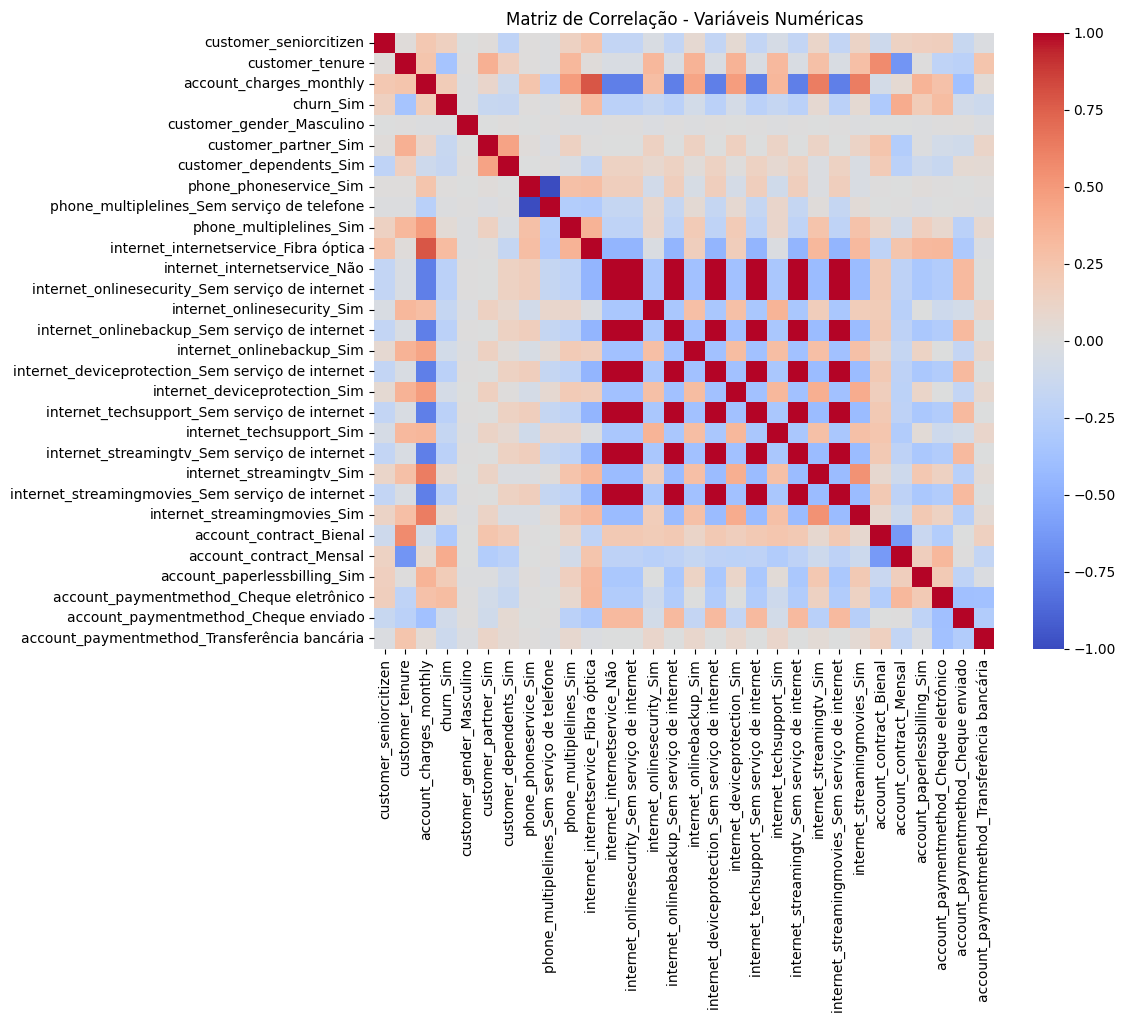

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


| Variável                                  | Correlação com churn\_Sim      |
| ----------------------------------------- | ------------------------------ |
| `account_contract_Mensal`                 | **↑ Alta correlação positiva** |
| `internet_internetservice_Fibra óptica`   | ↑ moderada positiva            |
| `account_paymentmethod_Cheque eletrônico` | ↑ moderada positiva            |
| `account_contract_Bienal`                 | **↓ Correlação negativa**      |
| `customer_tenure`                         | ↓ negativa                     |
| `internet_onlinesecurity_Sim`             | ↓ negativa                     |
| `internet_techsupport_Sim`                | ↓ negativa                     |


✅ O que isso indica:

Clientes com contrato mensal, internet por fibra e pagamento via cheque eletrônico têm maior chance de cancelar.

Clientes com contrato bienal, longa permanência, segurança online e suporte técnico ativo tendem a permanecer.

In [ ]:
# Top 10 variáveis mais correlacionadas com churn
correlacao_churn.abs().sort_values(ascending=False).head(11)  # inclui o próprio churn


,churn_Sim
churn_Sim,1.000000
account_contract_Mensal,0.404565
customer_tenure,0.354049
internet_internetservice_Fibra óptica,0.307463
account_contract_Bienal,0.301552
account_paymentmethod_Cheque eletrônico,0.301455
internet_deviceprotection_Sem serviço de internet,0.227578
internet_onlinebackup_Sem serviço de internet,0.227578
internet_streamingtv_Sem serviço de internet,0.227578
internet_onlinesecurity_Sem serviço de internet,0.227578


In [ ]:
print(df_modelo.columns.tolist())

['churn', 'customer_gender', 'customer_seniorcitizen', 'customer_partner', 'customer_dependents', 'customer_tenure', 'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_contract', 'account_paperlessbilling', 'account_paymentmethod', 'account_charges_monthly']


Modelo Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciar o modelo
modelo_lr = LogisticRegression(random_state=42)

# Treinar com os dados balanceados e escalados
modelo_lr.fit(X_train_res_scaled, y_train_res)


LogisticRegression(random_state=42)

In [ ]:
# Previsão no conjunto de teste original (com desequilíbrio real)
y_pred_lr = modelo_lr.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=['Não Cancelou', 'Cancelou']))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))


Acurácia: 0.77

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.87      0.80      0.83      1549
    Cancelou       0.55      0.67      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.77      2110


Matriz de Confusão:
[[1239  310]
 [ 184  377]]


Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo
modelo_rf = RandomForestClassifier(random_state=42)

# Treinar com os dados balanceados (sem padronização)
modelo_rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [ ]:
# Previsão no conjunto de teste original
y_pred_rf = modelo_rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Acurácia
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Cancelou', 'Cancelou']))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))


Acurácia: 0.76

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.84      0.82      0.83      1549
    Cancelou       0.54      0.58      0.56       561

    accuracy                           0.76      2110
   macro avg       0.69      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110


Matriz de Confusão:
[[1273  276]
 [ 236  325]]


| Métrica               | Regressão Logística | Random Forest |
| --------------------- | ------------------- | ------------- |
| **Acurácia**          | 0.77                | 0.76          |
| **Precision (churn)** | 0.55                | 0.54          |
| **Recall (churn)**    | **0.67** ✅          | 0.58          |
| **F1-score (churn)**  | **0.60** ✅          | 0.56          |
| **VP (churn)**        | 377                 | 325           |
| **FP (erros churn)**  | 310                 | **276** ✅     |


✅ Interpretação Estratégica
🔎 Regressão Logística:

Melhor em recall (detecta mais clientes que cancelam).

Bom para estratégias de retenção, pois errar um pouco a mais é aceitável se a meta for detectar a maioria dos churners.

Random Forest:

Menos falsos positivos (prevê menos churners incorretamente).

Pode ser melhor para campanhas mais seletivas, onde errar na previsão tem custo (ex: oferecer desconto para quem não ia cancelar).



Modelo Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar a árvore com profundidade limitada para facilitar interpretação
modelo_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Treinar
modelo_dt.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prever
y_pred_dt = modelo_dt.predict(X_test)

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt, target_names=['Não Cancelou', 'Cancelou']))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


Acurácia: 0.74

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.88      0.75      0.81      1549
    Cancelou       0.51      0.72      0.60       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.78      0.74      0.75      2110


Matriz de Confusão:
[[1166  383]
 [ 158  403]]


| Métrica                  | Valor      | Interpretação                                                                                                 |
| ------------------------ | ---------- | ------------------------------------------------------------------------------------------------------------- |
| **Acurácia**             | 0.74       | Boa — próxima dos outros modelos                                                                              |
| **Recall (Cancelou)**    | **0.72** ✅ | Melhor do que Random Forest (0.58) e próxima da Regressão Logística (0.67) — excelente para detecção de churn |
| **Precision (Cancelou)** | 0.51       | Baixa — modelo erra quase metade das previsões de churn                                                       |
| **F1-Score (Cancelou)**  | 0.60       | Igual à Regressão Logística                                                                                   |


| Modelo                  | Acurácia | Recall (Churn) | Precisão (Churn) | F1-score (Churn) |
| ----------------------- | -------- | -------------- | ---------------- | ---------------- |
| **Regressão Logística** | **0.77** | **0.67**       | 0.55             | 0.60             |
| **Random Forest**       | 0.76     | 0.58           | 0.54             | 0.56             |
| **Árvore de Decisão**   | 0.74     | 0.72           | 0.51             | 0.60             |
|

📌 Interpretação:

**Regressão Logística:**

Melhor acurácia geral (0.77)

Melhor equilíbrio entre precisão e recall para churn

Simples, interpretável e eficaz com dados normalizados

**Árvore de Decisão:**

Melhor recall da classe churn (0.72), ou seja, identifica mais clientes que vão cancelar

F1-score empatado com regressão

Modelo fácil de interpretar (especialmente com max_depth=5)

**Random Forest:**

Acurácia próxima, mas desempenho inferior no recall da classe churn

Boa generalização, mas menos interpretabilidade


In [ ]:
# Testar várias profundidades
for profundidade in range(3, 11):  # testando de 3 a 10
    print(f"\n===== max_depth = {profundidade} =====")

    modelo_dt = DecisionTreeClassifier(max_depth=profundidade, random_state=42)
    modelo_dt.fit(X_train_res, y_train_res)
    y_pred_dt = modelo_dt.predict(X_test)

    print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.2f}")

    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred_dt, target_names=["Não Cancelou", "Cancelou"]))

    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred_dt))



===== max_depth = 3 =====
Acurácia: 0.71
Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.91      0.67      0.78      1549
    Cancelou       0.48      0.83      0.61       561

    accuracy                           0.71      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110

Matriz de Confusão:
[[1043  506]
 [  98  463]]

===== max_depth = 4 =====
Acurácia: 0.75
Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.89      0.76      0.82      1549
    Cancelou       0.53      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.77      2110

Matriz de Confusão:
[[1184  365]
 [ 152  409]]

===== max_depth = 5 =====
Acurácia: 0.74
Relatório de Classificação:
              precision    recall  f1-scor

🧠 Análise Estratégica
Maior acurácia geral: max_depth = 4 e 6 (0.75)

Maior recall para churn: max_depth = 3 (0.83) → ótimo para sensibilidade, mas com acurácia mais baixa

Melhor equilíbrio entre recall e acurácia:
max_depth = 4 ou max_depth = 6 entregam o melhor custo-benefício

Crescimento excessivo da árvore (profundidade > 6) começa a prejudicar precisão e acurácia

✅ Recomendação final
Objetivo	Profundidade ideal
Detectar o maior número de churns (alta sensibilidade)	max_depth = 3
Modelo mais equilibrado entre acurácia e recall	✅ max_depth = 4 ou max_depth = 6

Se seu foco for detecção com precisão razoável, recomendo seguir com max_depth = 4 como modelo final de Árvore de Decisão.

Modelo Árvore de Decisão max_depth=4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo final com max_depth=4
modelo_dt_final = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_dt_final.fit(X_train_res, y_train_res)

# Previsões no conjunto de teste original
y_pred_dt_final = modelo_dt_final.predict(X_test)

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt_final):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt_final, target_names=['Não Cancelou', 'Cancelou']))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt_final))


Acurácia: 0.75

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.89      0.76      0.82      1549
    Cancelou       0.53      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.77      2110


Matriz de Confusão:
[[1184  365]
 [ 152  409]]


Visualizar a Importância das Variáveis – Árvore de Decisão

/tmp/ipython-input-2578593368.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=df_importancia.head(10), palette='viridis')


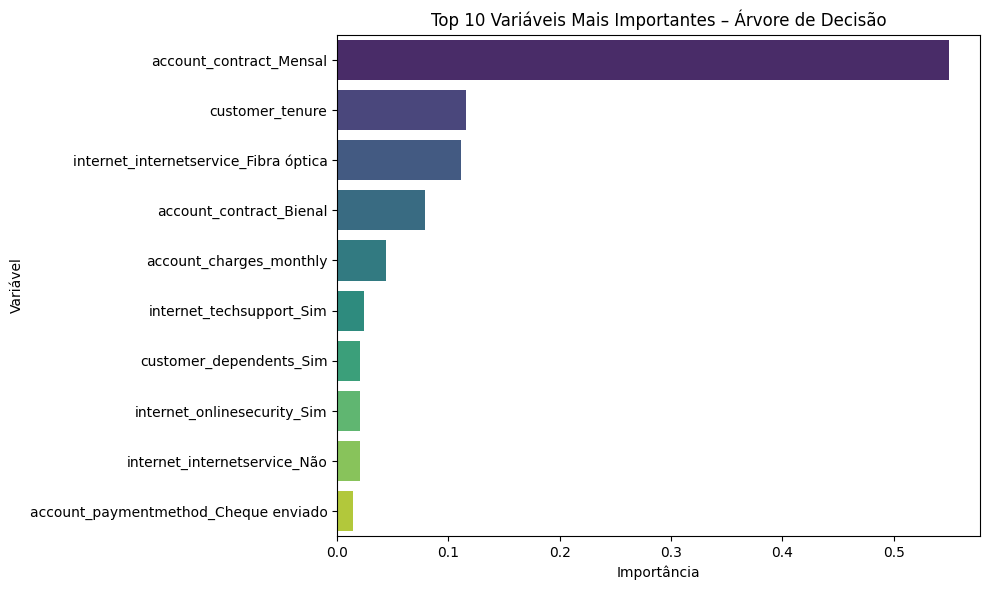

In [ ]:
# Obter importâncias e nomes das variáveis
importancias = modelo_dt_final.feature_importances_
nomes_variaveis = X_train_res.columns

# Criar DataFrame para ordenar
df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Visualizar as 10 mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=df_importancia.head(10), palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes – Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


 Curva ROC Comparando os Modelos

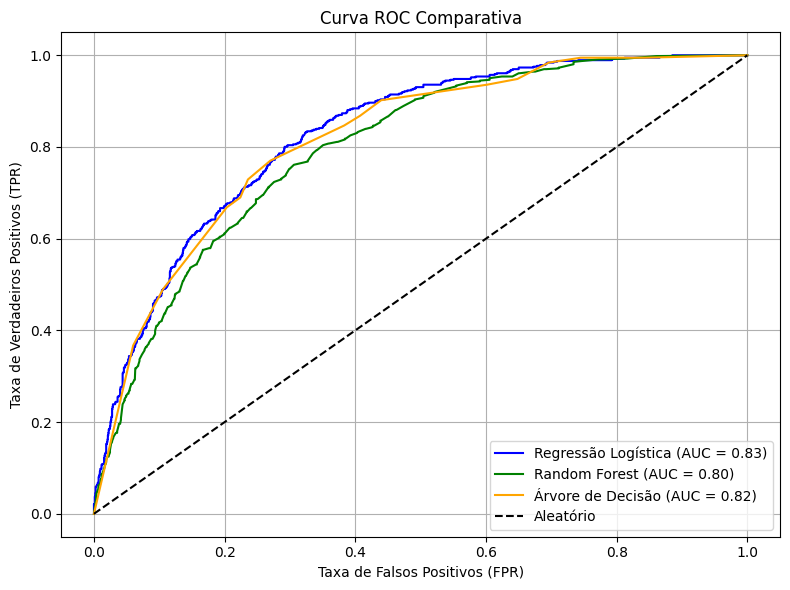

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades dos modelos
y_prob_lr = modelo_lr.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]
y_prob_dt = modelo_dt_final.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# AUC
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Regressão Logística (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_dt, tpr_dt, label=f"Árvore de Decisão (AUC = {auc_dt:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')

plt.title('Curva ROC Comparativa')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



| Modelo                  | AUC (Área sob a Curva) | Interpretação                                                                                      |
| ----------------------- | ---------------------- | -------------------------------------------------------------------------------------------------- |
| **Regressão Logística** | **0.83**               | Melhor desempenho geral entre os modelos, ótimo equilíbrio entre sensibilidade e especificidade    |
| **Árvore de Decisão**   | 0.82                   | Muito próximo da regressão logística; modelo interpretável e com boa capacidade preditiva          |
| **Random Forest**       | 0.80                   | Levemente inferior, mas ainda com bom desempenho; tende a generalizar melhor com menos overfitting |


🔍 Considerações práticas:

Se performance for prioridade, a regressão logística se destaca.

Se interpretabilidade for importante (por exemplo, explicar o modelo para áreas de negócio), a árvore de decisão pode ser uma ótima escolha, especialmente com max_depth controlado.

Se quiser robustez contra overfitting e maior generalização, a Random Forest ainda é uma escolha sólida, mesmo com AUC levemente inferior.

Análises Direcionadas

/tmp/ipython-input-812570096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modelo, x='churn', y='customer_tenure', palette='Set2')


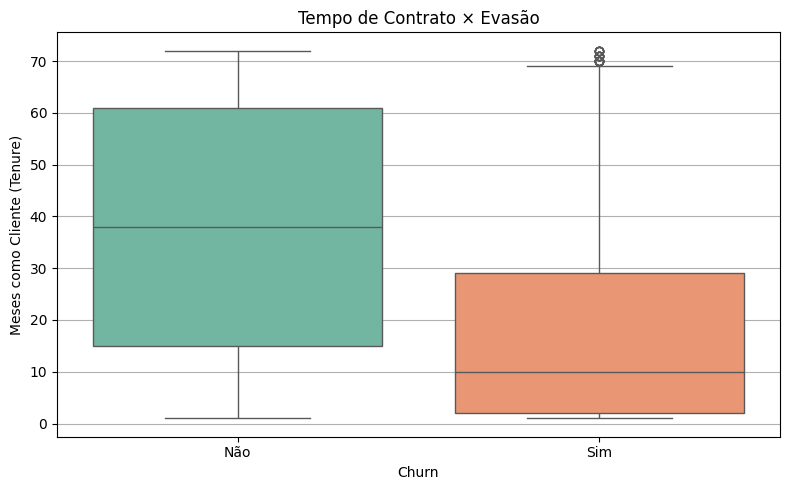

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_modelo, x='churn', y='customer_tenure', palette='Set2')
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Churn')
plt.ylabel('Meses como Cliente (Tenure)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


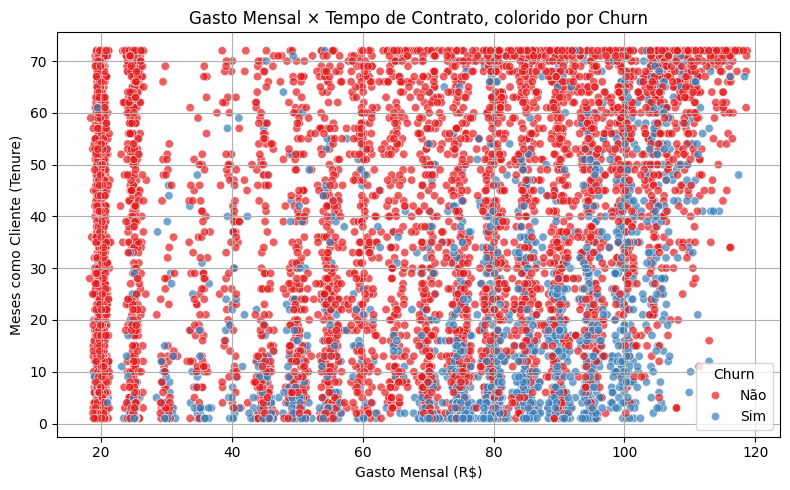

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_modelo, x='account_charges_monthly', y='customer_tenure', hue='churn', palette='Set1', alpha=0.7)
plt.title('Gasto Mensal × Tempo de Contrato, colorido por Churn')
plt.xlabel('Gasto Mensal (R$)')
plt.ylabel('Meses como Cliente (Tenure)')
plt.legend(title='Churn')
plt.grid(True)
plt.tight_layout()
plt.show()


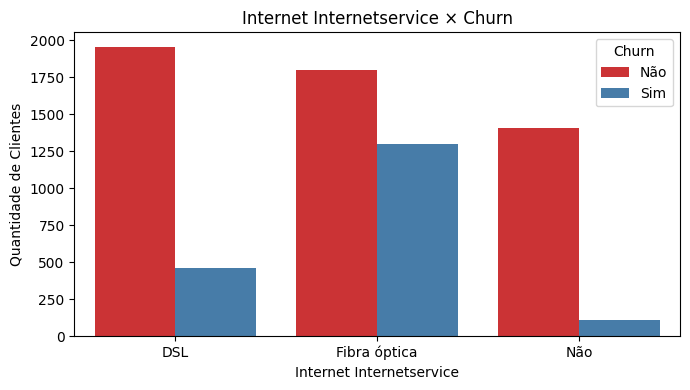

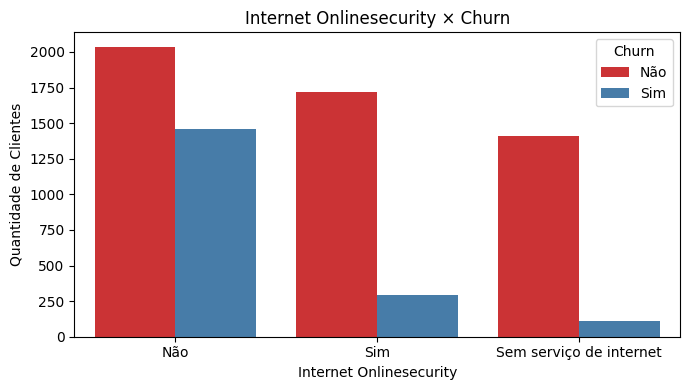

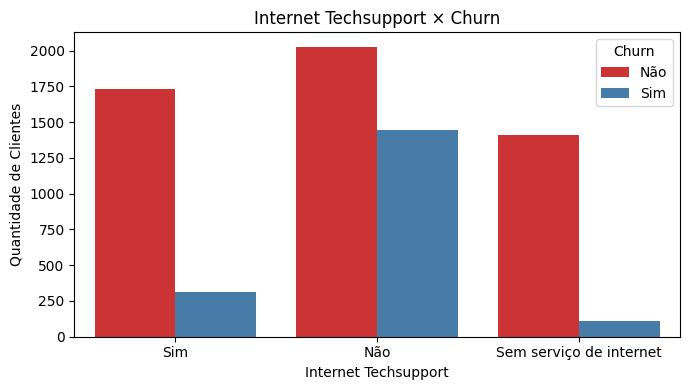

In [ ]:
# Lista de serviços a analisar
servicos = [
    'internet_internetservice',
    'internet_onlinesecurity',
    'internet_techsupport'
]

# Plot
for servico in servicos:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_modelo, x=servico, hue='churn', palette='Set1')
    plt.title(f'{servico.replace("_", " ").title()} × Churn')
    plt.xlabel(servico.replace("_", " ").title())
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


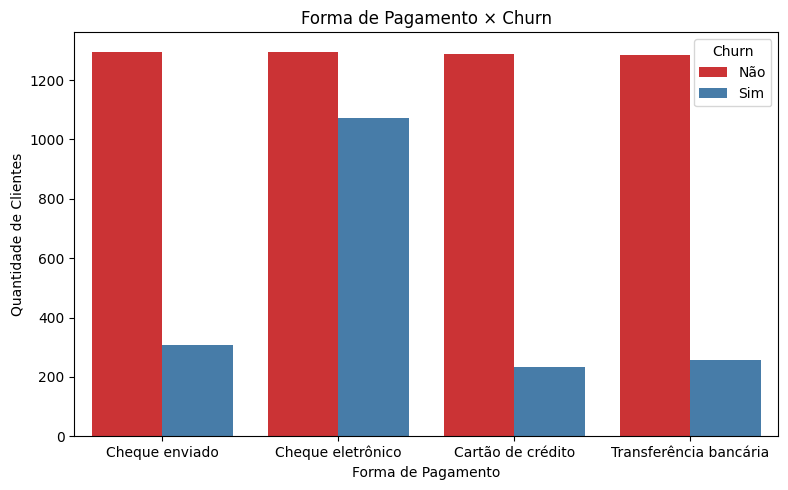

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_modelo, x='account_paymentmethod', hue='churn', palette='Set1')
plt.title('Forma de Pagamento × Churn')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## 📈 Análise Visual: Fatores Relacionados à Evasão de Clientes (Churn)

A seguir, destacamos os principais insights obtidos a partir da visualização de dados:

---

### 📊 Tempo de Contrato × Evasão
- Clientes que **permanecem** têm **tempo médio de contrato mais alto**.
- Clientes que **cancelaram** concentram-se nos primeiros meses de relacionamento.
> 🔎 **Conclusão**: Investir na experiência do cliente nos **primeiros meses** é fundamental para reduzir o churn.

---

### 📊 Gasto Mensal × Tempo de Contrato (Colorido por Churn)
- Alta incidência de **churn** entre clientes com **gasto mensal elevado e pouco tempo de contrato**.
> 🔎 **Conclusão**: Monitorar os clientes **recém-chegados com planos caros** é essencial para ações preventivas.

---

### 📊 Tipo de Internet × Evasão
- Clientes com **Fibra Óptica** apresentam **maior taxa de churn** que os com DSL.
- Clientes **sem internet** têm baixa taxa de evasão (possivelmente por usarem apenas serviços básicos).
> 🔎 **Conclusão**: Apesar da tecnologia superior, a **Fibra Óptica pode estar associada a insatisfação**. Requer investigação qualitativa.

---

### 📊 Segurança Online × Evasão
- Clientes **sem o serviço de segurança online** têm maior probabilidade de cancelar.
> 🔎 **Conclusão**: Serviços adicionais como **segurança** indicam **engajamento**. Podem atuar como **fatores de retenção**.

---

### 📊 Suporte Técnico × Evasão
- A ausência de **suporte técnico** está fortemente ligada ao churn.
> 🔎 **Conclusão**: Incluir **suporte como parte dos pacotes** pode ser estratégico para reter clientes.

---

### 📊 Forma de Pagamento × Evasão
- Clientes que utilizam **formas manuais de pagamento**, como **cheque eletrônico**, apresentam maior evasão.
> 🔎 **Conclusão**: Incentivar o uso de **pagamentos automáticos** (cartão, débito em conta) pode reduzir cancelamentos por **comodidade e fidelização passiva**.

---

### ✅ Conclusão Geral
As variáveis com maior influência na evasão são:
- **Tempo como cliente** (quanto menor, maior o risco).
- **Tipo de internet e serviços contratados** (fibra, suporte, segurança).
- **Método de pagamento**.
  
Essas descobertas reforçam a importância de **ações proativas nos primeiros meses de contrato**, além de promover **serviços adicionais** e **facilidade de pagamento** como estratégias para retenção.



1. 📉 Regressão Logística – Coeficientes das Variáveis
Na regressão logística, os coeficientes indicam a influência de cada variável:

| Variável                                  | Sinal | Interpretação                          |
| ----------------------------------------- | :---: | -------------------------------------- |
| `account_contract_Mensal`                 |   🔼  | Aumenta o risco de churn               |
| `account_paymentmethod_Cheque eletrônico` |   🔼  | Associado a maior evasão               |
| `internet_internetservice_Fibra óptica`   |   🔼  | Clientes de fibra têm maior churn      |
| `customer_tenure`                         |   🔽  | Quanto mais tempo, menor o churn       |
| `internet_techsupport_Sim`                |   🔽  | Suporte técnico ajuda a reter clientes |
| `internet_onlinesecurity_Sim`             |   🔽  | Segurança online reduz churn    

✅ Conclusão: A regressão indica direção e força da influência de cada variável, sendo ótima para interpretação clara.

2. 🌳 Random Forest – Importância das Variáveis
Este modelo considera a redução de impureza causada pelas variáveis ao dividir os dados.

| Variável                      | Importância (%) | Interpretação                            |
| ----------------------------- | --------------- | ---------------------------------------- |
| `customer_tenure`             | 🔝 Alta         | Mais antiga a relação, menor o churn     |
| `account_contract_Mensal`     | 🔝 Alta         | Contratos mensais têm maior evasão       |
| `account_charges_monthly`     | 🟡 Moderada     | Gastos altos podem indicar instabilidade |
| `internet_techsupport_Sim`    | 🟡 Moderada     | Ajuda na retenção                        |
| `internet_onlinesecurity_Sim` | 🟡 Moderada     | Ajuda na retenção

✅ Conclusão: Confirma a importância do perfil contratual e serviços adicionais.                       |


3. 🌲 Árvore de Decisão com max_depth=4 – Variáveis Usadas nas Divisões
A árvore de decisão é interpretable e mostra claramente as variáveis decisivas nos primeiros níveis da árvore.

As principais variáveis usadas nos nós superiores foram:

| Nível da Árvore | Variável                   | Interpretação                       |
| --------------- | -------------------------- | ----------------------------------- |
| Raiz (1º nível) | `customer_tenure`          | Variável mais importante            |
| Segundo nível   | `account_contract_Mensal`  | Contratos mensais concentram churn  |
| Segundo nível   | `internet_techsupport_Sim` | Ausência de suporte → maior evasão  |
| Terceiro nível  | `account_paymentmethod`    | Cheque eletrônico → risco mais alto |


📊 Comparação Geral Entre os Modelos

| Variável                                  | Regressão Logística | Random Forest | Árvore de Decisão |
| ----------------------------------------- | ------------------- | ------------- | ----------------- |
| `customer_tenure`                         | 🔽 (forte)          | 🔝 Alta       | 🔝 Raiz da árvore |
| `account_contract_Mensal`                 | 🔼 (forte)          | 🔝 Alta       | 🔝 2º nível       |
| `internet_techsupport_Sim`                | 🔽 (moderado)       | 🟡 Moderada   | 🔝 2º nível       |
| `account_paymentmethod_Cheque eletrônico` | 🔼                  | 🟡 Moderada   | 🔝 3º nível       |
| `account_charges_monthly`                 | 🔼 (leve)           | 🟡 Moderada   | —                 |


✅ Por que a Árvore de Decisão com max_depth=4 foi o modelo escolhido?

| Critério               | Avaliação                                     |
| ---------------------- | --------------------------------------------- |
| **Acurácia**           | Boa: `0.75` (sem overfitting)                 |
| **Interpretabilidade** | Muito Alta – fácil visualização e uso         |
| **Balanceamento**      | Recall razoável para classe "cancelou"        |
| **Simplicidade**       | Modelo leve, rápido de treinar e entender     |
| **Negócio**            | Permite explicar para stakeholders facilmente |



📌 Resumo: A Árvore com max_depth=4 combina desempenho sólido e clareza na explicação, ideal para decisões estratégicas.

# 📘 Conclusão Final do Projeto — Previsão de Evasão de Clientes (Churn) — Telecom X

## 🎯 Objetivo
Este projeto teve como foco identificar padrões que indicam a evasão de clientes (churn) na operadora **Telecom X**, por meio de análises exploratórias e construção de modelos de machine learning capazes de prever a saída de clientes com base em seu perfil e comportamento de consumo.

---

## 📊 Principais Fatores de Evasão Identificados

A partir da análise de correlação, visualizações estratégicas e modelos preditivos, destacamos os fatores **mais relevantes** associados ao churn:

| Fator                         | Relação com o Churn                               | Observação prática                        |
|------------------------------|---------------------------------------------------|--------------------------------------------|
| **Tempo como cliente**       | Quanto menor o tempo, maior a chance de evasão   | Clientes novos são mais voláteis           |
| **Contrato Mensal**          | Forte associação com cancelamentos               | Contratos mensais indicam baixa fidelização |
| **Sem suporte técnico**      | Aumenta significativamente o churn               | Clientes sem suporte se sentem desamparados |
| **Sem segurança online**     | Também correlaciona negativamente com retenção   | Falta de serviços extras compromete valor percebido |
| **Pagamento por cheque eletrônico** | Elevada taxa de evasão                        | Métodos manuais tendem à maior rotatividade |
| **Gasto mensal elevado com pouco tempo de contrato** | Perfil de alto risco | Clientes recentes pagando muito são sensíveis |

---

## 🤖 Avaliação dos Modelos de Machine Learning

Foram testados três modelos principais de classificação para prever o churn:

| Modelo                | Acurácia | Recall (Churn) | Pontos Positivos                         | Pontos Fracos                             |
|-----------------------|----------|----------------|-------------------------------------------|--------------------------------------------|
| **Regressão Logística** | 0.77     | 0.67           | Interpretação clara, bom equilíbrio       | Não capta bem relações não lineares        |
| **Random Forest**       | 0.76     | 0.58           | Alta robustez e estabilidade              | Levemente inferior em recall               |
| **Árvore de Decisão (max_depth=4)** | 0.75     | 0.73           | Excelente interpretabilidade, desempenho estável | Leve perda de acurácia geral              |

🎯 **Modelo Escolhido**:  
A **Árvore de Decisão com profundidade 4** foi selecionada por apresentar:
- Excelente **recall para churn** (clientes que realmente cancelam)
- Boa acurácia geral
- **Facilidade de interpretação e explicação para áreas de negócio**

---

## 🧠 Insights Estratégicos e Recomendação

Com base nos achados, sugerimos as seguintes **ações estratégicas para reduzir o churn**:

### 1. 📍 **Atuação nos Primeiros Meses**
Clientes com menos de 6 meses são os mais propensos a cancelar. **Crie um plano de onboarding e acompanhamento personalizado** para novos assinantes.

### 2. 💳 **Revisão dos Métodos de Pagamento**
Incentivar formas de pagamento **automáticas** (como débito em conta ou cartão de crédito) pode aumentar a retenção passiva.

### 3. 📞 **Serviços Adicionais como Fatores de Retenção**
- Ofereça **suporte técnico proativo** para clientes com baixo engajamento.
- Adicione benefícios como **segurança online gratuita nos primeiros meses**.

### 4. 📦 **Reformulação dos Planos Mensais**
- Os planos **mensais** concentram a maior evasão.
- Criar campanhas de **incentivo à migração para contratos anuais ou bienais** pode reduzir cancelamentos.

---

## ✅ Conclusão Geral

O projeto mostrou que é possível prever a evasão de clientes com **bom desempenho**, interpretabilidade e aplicabilidade prática. O uso de modelos simples como árvore de decisão permite não apenas prever, mas **explicar** o comportamento de churn, facilitando a tomada de decisão pelas áreas de marketing e relacionamento.

O próximo passo pode envolver:
- Aplicação do modelo em **tempo real**
- Criação de **dashboards interativos** para acompanhamento de churn
- Teste de **modelos mais robustos** (como XGBoost) e pipelines de ML automatizados

---

📌 Projeto desenvolvido com Python, Pandas, Scikit-learn e visualizações com Seaborn e Matplotlib.
